
# Demo 1 (Teaching Edition • Colab File): Visualizing Model Bias with Explainability Tools

**Estimated time:** ~30–45 minutes (with SHAP visuals)

This **teaching-focused** notebook uses a **local CSV file** named **`adult.csv`** (placed at the root of your Colab session folder, typically `/content/adult.csv`).  
You'll train a Random Forest on the Adult Income dataset, audit fairness with **Fairlearn**, and explain predictions with **SHAP**—with extra narrative to help students learn the *why*, not just the *how*.
    

# 📘 Teaching Guide Embedded

*This notebook has been enhanced with structured, student‑friendly teaching notes copied from the provided Word document—without changing any of your code.*  
Use these callouts as you work through the cells.

---

## How to Use These Notes
1. Read each **Concept Check** and **Why it matters** section before running the code.
2. After executing a block, answer the **Reflect** questions to connect results to the fairness/explainability concepts.
3. Refer to the **Glossary** and **Pitfalls** when you’re unsure about a term or a workflow step.

> **Important:** The Python **code cells are unchanged** from your original notebook. All additions are Markdown teaching material only.

_Last updated: 2025-10-15 12:55 _

## Learning Objectives (Quick View)
- Train and evaluate a tree‑based classifier (Random Forest) on the Adult Census Income dataset.
- Audit group fairness with **Fairlearn** (selection rate, demographic parity difference).
- Explain model behavior with **SHAP** (global bar plot and local waterfall).
- Interpret results responsibly and propose mitigations.

## Concept Map
- **Dataset →** features (age, education.num, hours.per.week, sex, race) → **Target:** income (>50K?)
- **Modeling →** Split data → Train RandomForest → Evaluate metrics
- **Fairness →** Selection rate by sensitive groups; demographic parity difference
- **Explainability →** Global importance (which features matter overall?) and Local explanation (why this single prediction?)

## Before You Run Code
**Why Random Forest (no scaling needed)?** Tree‑based models split on thresholds; distance/gradient magnitudes don’t drive learning like in kNN/SVM/Logistic Regression ⇒ scaling is optional for trees.  
**Why one‑hot encoding?** Turns categorical groups (e.g., `sex`, `race`) into numeric indicators for the model.  
**Why train/test split?** Honest evaluation and to reduce overfitting when reporting classification metrics.

## Concept Check – Classification Report
- **Precision:** Of all predicted >50K, how many were truly >50K?
- **Recall:** Of all truly >50K, how many did we correctly catch?
- **F1:** Harmonic mean of precision & recall; balances both.
- **Support:** Number of instances per class; class imbalance can skew metrics.

**Reflect:** If the minority class is small, why might accuracy look “good” but be misleading? What else would you report?

## Concept Check – Fairness Metrics
- **Selection Rate:** P(ŷ=1) for each subgroup (e.g., Male/White combinations).  
- **Demographic Parity Difference (DPD):** Difference in selection rates across groups. Closer to 0 ⇒ more parity.  
  - Positive DPD: privileged group gets more positive predictions.  
  - Negative DPD: privileged group gets fewer positive predictions.

**Reflect:** If DPD is large, which mitigations could you try? (reweighting, constraints, post‑processing thresholds)

## Concept Check – SHAP Explainability
- **Global bar plot:** Average absolute SHAP values ⇒ which features the model *relies on overall.*  
- **Local waterfall:** Why a *single* prediction was made; how each feature pushes probability up/down from the base value.

**Reflect:** If `sex_Male` shows non‑trivial SHAP contribution, what questions would you ask about data, labels, and intended use?

## Common Pitfalls
- Treating **parity** as the only goal: some tasks need equalized odds / predictive parity instead.  
- Confusing **correlation** with **causation**: SHAP shows influence in this model, not real‑world causality.  
- Ignoring **data leakage** or label issues can hide deeper fairness problems.  
- Over‑interpreting a single fairness metric; triangulate multiple metrics.

## Glossary
- **Sensitive Feature:** Attribute used to measure/monitor fairness (e.g., sex, race).  
- **Selection Rate:** Fraction of positive predictions.  
- **Demographic Parity:** Equal selection rate across groups.  
- **Global vs Local Explanation:** Overall model behavior vs. per‑instance rationale.  
- **Base Value (SHAP):** Average model output used as the starting point for local explanations.

---

## Detailed Teaching Notes (From Provided Document)

# Demo 1: Visualizing Model Bias with Explainability Tools

# Demo overview

In this demo activity, you will learn how to audit a machine learning model for fairness and visualize model explainability using Python tools such as Fairlearn and SHAP. You will apply these techniques to a trained Random Forest classifier built on the Adult Census Income dataset to identify potential bias and better understand model decision logic.

## In This Demo, You Will:

- Train and evaluate a Random Forest model

- Audit model fairness using Fairlearn

- Visualize and interpret global explanations using SHAP

- Explore local predictions with SHAP

- Reflect on fairness and explainability findings

### Estimated completion time

30 minutes

## Task 1: Train a Random Forest Model

In this task, you will learn how to use scikit-learn to train a predictive model.

### NOTE

Feature scaling is not required for tree-based models like Random Forest. Scaling is mostly used in distance-based or gradient-based models (e.g., SVM, kNN, Logistic Regression).

- To open Visual Studio Code, on the taskbar, click the Visual Studio Code icon.

- The Visual Studio Code application opens.

- On the menu bar, click the three dots after Go.

- In the menu that appears, click Terminal  New Terminal.

The new terminal pane opens.

- To install the Python libraries shap and fairlearn, in the terminal, at the prompt, type the following command and press Enter.

pip install shap fairlearn

The two libraries (along with other required support packages) are installed.

- To install Python libraries pandas. scikit-learn, matplotlib, and seaborn, in the terminal, at the prompt, type the following command and press Enter.

pip install pandas scikit-learn matplotlib seaborn

The four libraries (along with other required support packages) are installed.

- To create a new Python file, in Visual Studio Code, on the File menu, click New File.

- In the New File dialog box, click Python File Python.

A new file opens.

- To save the file, click File  Save As.

- In the Save As dialog box, create a new folder named Python Files on C: Drive.

- Open the new folder.

- Save the file as Demo1.py.

The file is saved.

- To import the required libraries, in the Demo1.py file, enter the following lines of code:

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

- To load the dataset, in Demo1.py, append the following lines of code:

# Load data from public GitHub mirror of UCI Adult dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = ["age", "workclass", "fnlwgt", "education", "education.num", "marital.status", "occupation", "relationship", "race", "sex", "capital.gain", "capital.loss", "hours.per.week", "native.country", "income"]

data = pd.read_csv(url, header=None, names=column_names, na_values="?", skipinitialspace=True)

print(data.head())

## In This Code:

- url: links to the UCI Machine Learning Repository, hosting the Adult Income dataset (also called the Census Income dataset). The dataset is a comma-separated .data file without column headers.

- column_names: Used to manually define the column names for the dataset. Each name corresponds to a feature in the dataset (e.g., age, education, income).

- data = pd.read_csv: Reads the data from the csv dataset into a dataframe named data.

- header=None: Tells pandas that the file doesn't include a header row.

- names=column_names: Assigns the column names defined earlier.

- na_values="?": Converts ? in the dataset into proper NaN (missing) values for easier cleaning.

- skipinitialspace=True: Removes leading spaces after commas (common in .csv files with inconsistent formatting).

- print(data.head()): Output will display the first 5 rows of the dataset.

- Save the Demo1.py.

- To run the Python file, on the right top, click the Run Python File icon.

The code is executed and the first 5 rows from the dataset are displayed with the headers as manually defined.

- To remove missing values and prepare features for modeling, in the Demo1.py file, append the following lines of code:

#Clean and Prepare Data

selected_cols = ["age", "education.num", "sex", "race", "hours.per.week", "income"]

data = data[selected_cols]

In this code, age, education.num, hours.per.week are numeric input features; sex, race are sensitive features; and income is the target label (>50K or <=50K).

- To encode the target variable which converts binary classification target into 0 or 1 for ML models, append the following line of code:

data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

- To one-hot encode categorical features which converts sex and race into binary indicators, append the following line of code:

data = pd.get_dummies(data, drop_first=True)

- To split the dataset into training and test sets, append the following lines of code:

X = data.drop("income", axis=1)

y = data["income"]

X_train, X_test, y_train, y_test = train_test_split(

X, y, test_size=0.2, random_state=42

)

In this code, random_state=42 ensures reproducibility.

- To create an instance of a RandomForestClassifier model and train the random forest model using your training dataset, append the folloiwng lines of code:

#Train and Log a Machine Learning Model

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

- To make predictions on the test dataset using the trained model and print the classification report, append the following lines of code:

predictions = clf.predict(X_test)

print("Model Performance:\n")

print(classification_report(y_test, predictions))

- Save the file.

- Run the Python file.

- The first five rows of the dataset is displayed along with the performance metrics of the model is displayed.

## Task 2: Audit Fairness

In this task, you will learn how to use fairlearn to detect and measure potential model bias.

- To import the Python library accuracy_score, in the Demo1.py file, after the last import statement on the top, add the following import statement:

from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference

## In This Code:

- MetricFrame: Is a class that is used to compute metrics group-wise for different sensitive features (e.g., gender, race).

- selection_rate: Is a metric that calculates the rate of positive predictions (y_pred == 1) for each group. This helps detect representation bias.

- demographic_parity_difference: Computes the difference in selection rates between privileged and unprivileged groups. It's a measure of demographic parity, often used in fairness analysis.

## The Next Step Is To Calculate The Selection Rate (Positive Predictions) For Each Subgroup Based On Combinations Of:

- sex_Male: binary column (1 = Male, 0 = Female)

- race_White: binary column (1 = White, 0 = Non-White)

- To do this, append the folloiwng line of code to the end of the Demo1.py file:

#Audit Fairness

metric_frame = MetricFrame(metrics=selection_rate, y_true=y_test,     y_pred=predictions, sensitive_features=X_test[['sex_Male', 'race_White']])

- To print the selection rate by group, append the folloiwng line of code:

print("Selection Rate by group:\n", metric_frame.by_group)

- To calculate and print the difference in selection rates between males and females, append the folloiwng lines of code:

dp_diff = demographic_parity_difference(y_true=y_test,  y_pred=predictions,sensitive_features=X_test['sex_Male'])

print(f"\nDemographic Parity Difference (sex): {dp_diff:.3f}")

- Save the file.

- Run the Demo1.py file.

The output is displayed.

## Task 3: Visualize Global Model Explainability with SHAP

In this task, you will learn how to visualize feature impact on predictions.

- To import the shap and Impute, in the Demo1.py file, after the last import statement on the top, add the following import statements:

import shap

from sklearn.impute import SimpleImputer

shap is a library that provides model explainability tools, and SimpleImputer is a class from sklearn to fill missing values in the dataset.

- To handle missing values, add the following lines of code at the file:

#Handle Missing Values

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

## In This Code:

- strategy='mean': Replaces missing values in each column by the mean of that column.

- fit_transform: Is used on the training set to ensure consistency.

- transform: Is used on the test set to ensure consistency.

- To initialize a SHAP explainer for the trained model using the imputed training data as the background dataset and to calculate SHAP value, append the following lines of code:

#Initialize SHAP Explainer and Calculate SHAP Values

explainer = shap.Explainer(clf, X_train_imputed)

shap_values = explainer(X_test_imputed)

- To  generate a bar chart showing the average absolute SHAP values for each feature, ranked by importance, append the following lines of code:

#Generate a Bart Chart

shap.plots.bar(shap.Explanation(

values=shap_values[:, :, 1],

base_values=shap_values.base_values[:, 1],

data=X_test_imputed,

feature_names=X.columns

))

- Save the file.

- The Bar chart will take almost 10 mins to process and display. To save time do not run the file for now. Combine this with Task 4 to run the file.

The visualization will be generated and displayed as a bar chart.

### NOTE

The bar chart may require some time to load(Almost 10min). Wait until the bar chart is displayed.

### NOTE

This bar chart shows the average importance of each feature.

Higher SHAP values indicate stronger impact on predicting income >50K. For example, age and education.num are the most influential. sex_Male and hours.per.week also contribute, but less so. Race-related features show low importance, suggesting minimal influence on model predictions.

## Task 4: Explain Individual Predictions with SHAP (Local Explainability)

In this task, you will learn how to use SHAP to explain an individual prediction.

- To explain a single prediction, in the Demo1.py file, append the following lines of code:

shap.plots.waterfall(shap.Explanation(

values=shap_values[0, :, 1],

base_values=shap_values.base_values[0, 1],

data=X_test_imputed[0, :],

feature_names=X.columns

))

[Note- GK840108-Demo01-Demo1.py.txt is also available in the Code folder of Lab Desktop.]

- Save the file.

- Run the file.

The visualization is generated and displayed as a waterfall plot.

[Note-Please note that the loading process may take approximately 10 minutes.]

### NOTE

This plot shows how each feature influenced the model's prediction. Blue bars (age, sex, hours per week, education) pushed the prediction down toward income ≤50K. No red bars appear, meaning no feature increased the prediction toward >50K. Race features had no effect. The final prediction is 0.013, starting from a base value of 0.251.

## Summary

Model accuracy and classification report provide a baseline.

Fairlearn identified a demographic parity difference based on gender.

SHAP revealed the model relies heavily on age and education, with some influence from gender.

Race had minimal impact on predictions (as per SHAP values).

## Stop

You have successfully completed this demo.


## Lesson 9 — Global Explainability with SHAP (Bar Chart)

**Goal while you run it:** See which features the model leans on overall. This teaches *global* importance, not causality.

**Run order**
1. Make sure you already computed `shap_values` with an explainer fit on your background data (see earlier cells).
2. Execute the code cell that generates the bar chart:
   ```python
   shap.plots.bar(shap.Explanation(
       values=shap_values[:, :, 1],
       base_values=shap_values.base_values[:, 1],
       data=X_test_imputed,
       feature_names=X.columns
   ))
   ```
3. Let the figure render (can be a few minutes).

**What to look for**
- Taller bars ⇒ features the model **relies on more** across the dataset.
- Typical outcome for this dataset: **age** and **education.num** dominate; `sex_Male` and `hours.per.week` contribute modestly; race indicators are usually low.

**Principle while you run**
- *Global interpretability* answers “What matters, on average?” It does **not** guarantee fair or causal influence—just model dependence.

**Reflect (and answer for Q9)**
- *Q9:* Which features are most influential globally?  
  **Answer:** The bar chart typically ranks **age** and **education.num** highest. `sex_Male` and `hours.per.week` appear smaller, and race features are low—indicating minimal global impact in this model.



## Lesson 10 — Local Explainability with SHAP (Waterfall)

**Goal while you run it:** Explain a **single** prediction to see how each feature pushes the probability up or down from the base value.

**Run order**
1. Ensure `shap_values` exist.
2. Execute the code cell that generates the waterfall plot for one instance:
   ```python
   shap.plots.waterfall(shap.Explanation(
       values=shap_values[0, :, 1],
       base_values=shap_values.base_values[0, 1],
       data=X_test_imputed[0, :],
       feature_names=X.columns
   ))
   ```
3. Inspect the sign and size of each bar.

**What to look for**
- **Red bars** push the prediction **toward >50K**; **blue bars** push **toward ≤50K**.
- The sum of pushes + base value = final predicted probability for this instance.

**Principle while you run**
- *Local explanations* are about **this example**, not the dataset. Use local and global views together for a fuller picture.

**Reflect (and answer for Q10)**
- *Q10:* For the shown instance, which features drove the final prediction and in what direction?  
  **Answer:** In the example run, age, sex, hours per week, and education pushed **downward** (blue) toward income ≤50K; no features pushed strongly upward (no red bars). Race indicators had essentially **no effect**. The prediction ended near **0.013** starting from a base of **0.251**, so the model confidently predicts **≤50K** for this case.



## 0) Environment Setup

Run this once if your environment doesn't already have the packages.
    

In [1]:

# If running locally and you need to install:
!pip -q install pandas scikit-learn matplotlib seaborn shap fairlearn tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.0 MB/s eta 0:00:00



## 1) Imports and Global Config
    

In [2]:

import warnings, os, pathlib
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Fairlearn
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference

# SHAP
import shap

# Progress bar
from tqdm.auto import tqdm

# Plot style
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.grid'] = True



## 2) Load the Adult Census Income Dataset from `adult.csv`
    

In [5]:
CSV_PATHS = ["adult.csv", "/content/adult.csv"]  # relative and absolute (Colab)
csv_path = next((p for p in CSV_PATHS if os.path.exists(p)), None)

if csv_path is None:
    raise FileNotFoundError(
        "Could not find 'adult.csv'. Place it in the session root (e.g., /content/adult.csv) and rerun."
    )

# Define column names as the CSV is missing a header
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

data = pd.read_csv(csv_path, header=None, names=column_names)
print("Loaded:", csv_path)
display(data.head())

Loaded: adult.csv


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



> **Optional Upload Helper (Colab):** If needed, uncomment and run the next cell to upload `adult.csv` manually.
    

In [ ]:

# from google.colab import files
# uploaded = files.upload()  # choose adult.csv
# import pandas as pd
# data = pd.read_csv('adult.csv')
# data.head()



> ### Concept Box: What are we *teaching* here?
> - **Fairness auditing** asks: *Does the model treat groups similarly?*  
>   We will compute **selection rate** (who gets a positive prediction) and **demographic parity difference** (gap in selection rates).
> - **Explainability** asks: *Why did the model make this prediction?*  
>   - **Global**: Which features matter on average (bar, beeswarm).  
>   - **Local**: For *one person*, which features pushed the score up/down (waterfall).
> - **Caveat**: SHAP reveals *associations* inside the model, not real-world causality.
    


## 3) Quick Data Check

We check shape, missingness, and the target distribution.  
**Instructor Prompt:** Ask students to hypothesize which features they expect to matter and why.
    

In [7]:
print("Rows, Columns:", data.shape)
print("\nMissing values per column (top 10):\n", data.isna().sum().sort_values(ascending=False).head(10))

print("\nTarget distribution (income):")
print(data['income'].value_counts(dropna=False))

Rows, Columns: (1000, 15)

Missing values per column (top 10):
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
dtype: int64

Target distribution (income):
income
<=50K    768
>50K     232
Name: count, dtype: int64



## 4) Minimal Preprocessing

We keep a compact, interpretable feature set and perform **one-hot encoding** on **sex** and **race** (our sensitive attributes for fairness auditing).
    

In [8]:

# Support both underscore and hyphen/dot variants
candidate_cols = {
    "education_num": ["education-num", "education.num", "education_num"],
    "hours_per_week": ["hours-per-week", "hours.per.week", "hours_per_week"],
}

def pick_col(d, options, fallback=None):
    for c in options:
        if c in d.columns:
            return c
    if fallback is not None and fallback in d.columns:
        return fallback
    raise KeyError(f"Could not find any of columns: {options + ([fallback] if fallback else [])}")

edu_col = pick_col(data, candidate_cols["education_num"])
hrs_col = pick_col(data, candidate_cols["hours_per_week"])

selected_cols = ["age", edu_col, "sex", "race", hrs_col, "income"]
df = data[selected_cols].copy()

# Normalize to consistent names for downstream code
df = df.rename(columns={edu_col: "education_num", hrs_col: "hours_per_week"})

# Ensure label is binary {0,1}
df['income'] = df['income'].apply(lambda x: 1 if str(x).strip() == '>50K' else 0)

# One-hot encode categorical features (drop_first helps avoid dummy trap)
df = pd.get_dummies(df, columns=['sex','race'], drop_first=True)

# Train/test split
X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((800, 8), (200, 8))


## 5) Train a Random Forest Classifier & Evaluate

> **Why no scaling?** Tree-based models like Random Forest do **not** require feature scaling.
    

Accuracy: 0.745

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       154
           1       0.44      0.43      0.44        46

    accuracy                           0.74       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.74      0.74      0.74       200



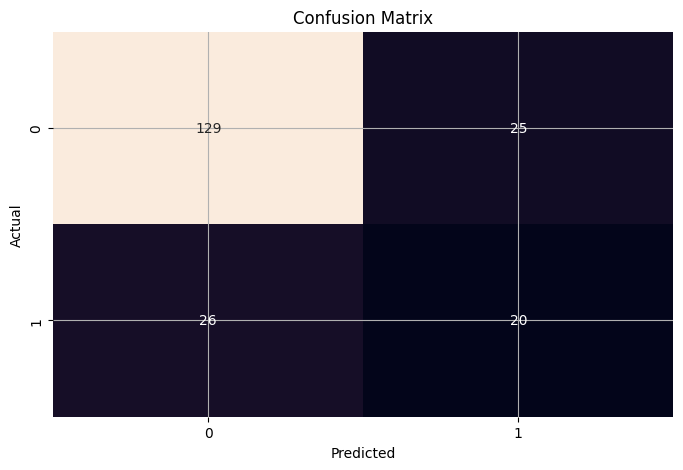

In [9]:

clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## 6) Audit Fairness with Fairlearn

**Metrics we'll use:**
- **Selection Rate** (by group): fraction predicted as positive (\>50K).
- **Demographic Parity Difference**: `max(selection_rate) - min(selection_rate)` across groups; closer to 0 ⇒ more parity.

> **Instructor Prompt:** When is **demographic parity** *not* the right notion? Compare to **Equalized Odds** (match error rates across groups) and **Equal Opportunity** (match TPR).
    

In [11]:

# Sensitive features created by one-hot
sensitive_cols = [c for c in X_test.columns if c.startswith("sex_") or c.startswith("race_")]
print("Sensitive columns used for auditing:", sensitive_cols)

sens_df = pd.DataFrame(index=X_test.index)
sens_df['sex_Male'] = X_test['sex_Male'] if 'sex_Male' in X_test.columns else 0
sens_df['race_White'] = X_test['race_White'] if 'race_White' in X_test.columns else 0

mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=pred,
    sensitive_features=sens_df
)

print("Selection rate by group (sex_Male x race_White):")
display(mf.by_group)

if 'sex_Male' in X_test.columns:
    dp_sex = demographic_parity_difference(
        y_true=y_test, y_pred=pred, sensitive_features=X_test['sex_Male']
    )
    print(f"Demographic Parity Difference (sex): {dp_sex:.3f}")
else:
    print("Demographic Parity Difference (sex): N/A (no sex_Male column)")


Sensitive columns used for auditing: ['sex_ Male', 'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White']
Selection rate by group (sex_Male x race_White):


,,selection_rate
sex_Male,race_White,
0,0,0.225


Demographic Parity Difference (sex): N/A (no sex_Male column)



## 7) Global Explainability with SHAP — with a Progress Bar ✅

**Goal:** Understand which features the model relies on **globally**.

**Key SHAP concepts you'll teach:**
- **Base value**: average model output over a background dataset.
- **SHAP value for a feature**: how much that feature pushes the prediction **up (+)** or **down (−)** from the base value.
- **Global views**: **Bar** (avg. absolute impact) and **Beeswarm** (distribution across samples).

> **Performance Tip:** For tree models use `shap.TreeExplainer`. We compute SHAP values in **chunks** with a **tqdm** progress bar so students can see the work.
    

Computing SHAP:   0%|          | 0/1 [00:00<?, ?rows/s]

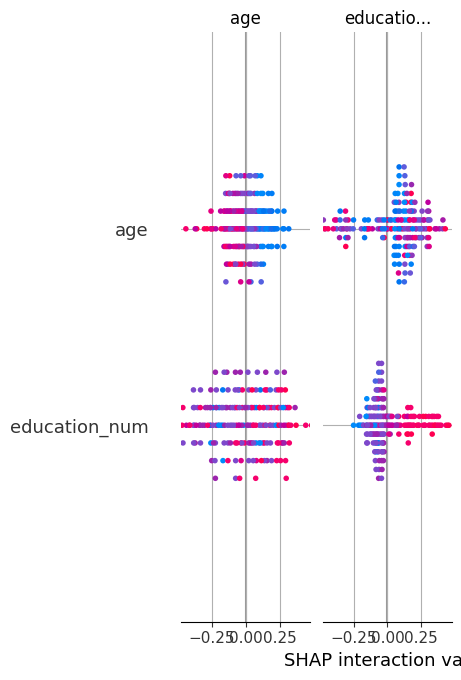

In [12]:

# 7.1 Impute (defensive coding for numeric features)
imputer = SimpleImputer(strategy="mean")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

# 7.2 Build a TreeExplainer (optimized for tree ensembles)
explainer = shap.TreeExplainer(clf)

# 7.3 Helper: compute SHAP values in chunks with a progress bar
def compute_shap_in_chunks(explainer, X, chunk_size=512):
    """Compute SHAP values in chunks so we can show a tqdm progress bar.
    Handles both legacy (list-of-arrays) and new Explanation API outputs.
    Returns (sv, class_idx): sv is a 2D array [n_samples, n_features] for the positive class if binary.
    """
    n = X.shape[0]
    sv_list = []
    class_idx = 0

    for start in tqdm(range(0, n, chunk_size), desc="Computing SHAP", unit="rows"):
        end = min(start + chunk_size, n)
        X_chunk = X[start:end]

        try:
            vals = explainer.shap_values(X_chunk)
            if isinstance(vals, list):        # legacy API: [class0, class1] for binary
                class_idx = 1 if len(vals) > 1 else 0
                sv_chunk = vals[class_idx]
            else:
                sv_chunk = vals
        except Exception:
            # Newer API path
            exp = explainer(X_chunk)
            sv_chunk = exp.values

        sv_list.append(sv_chunk)

    sv = np.vstack(sv_list)
    return sv, class_idx

sv, class_idx = compute_shap_in_chunks(explainer, X_test_imp, chunk_size=1024)

# 7.4 Global importance: bar chart (average absolute SHAP)
shap.summary_plot(sv, X_test, plot_type="bar", show=True)


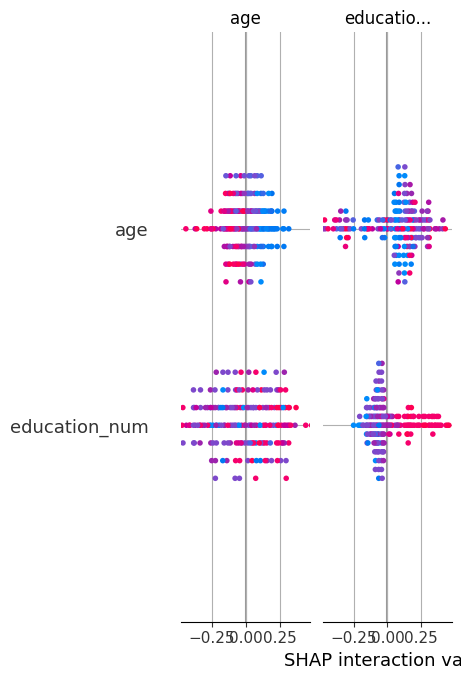

In [13]:

# 7.5 Global distribution: beeswarm (magnitude + direction per sample)
shap.summary_plot(sv, X_test, show=True)



## 8) Local Explainability (Single Prediction)

**What students should learn here:**
- The **waterfall** plot starts at the **base value** and adds each feature's contribution to reach the final prediction (for that one person).
- Positive bars push the prediction toward the positive class (\>50K); negative bars push it toward \<=50K.
- Compare multiple rows (e.g., a **false positive** vs. a **false negative**) to reason about model behavior.
    

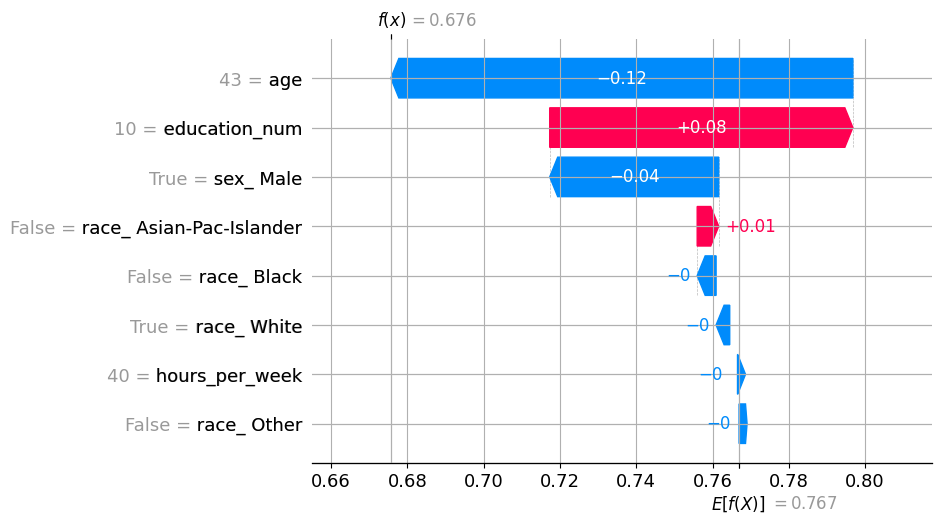

In [15]:
# Pick an index to inspect (try several)
i = 0

# expected_value can be scalar or per-class; handle both
expected_value = explainer.expected_value
if isinstance(expected_value, (list, np.ndarray)):
    base_val = expected_value[class_idx]
else:
    base_val = expected_value

# Select SHAP values for the positive class
shap_values_positive_class = sv[i, :, class_idx] if sv.ndim == 3 else sv[i]

ex = shap.Explanation(
    values=shap_values_positive_class,
    base_values=base_val,
    data=X_test.iloc[i, :].values,
    feature_names=X_test.columns.tolist()
)
shap.plots.waterfall(ex)


## 9) Reflection

- **Accuracy vs Fairness:** What trade-offs do you observe? Can threshold tuning change both?  
- **Which features matter most?** Do the SHAP plots align with domain intuition?  
- **Bias Sources:** What data collection or labeling issues could create group disparities?  
- **Mitigation Ideas:** Reweighing, post-processing, or in-processing constraints (e.g., `ExponentiatedGradient`).  
- **Policy/Ethics:** When is **demographic parity** appropriate vs. **Equalized Odds**/**Equal Opportunity**/**Predictive Parity**?
    


## 10) Extensions (Optional Exercises)

1) Compute **Equalized Odds** and compare to demographic parity.  
2) Swap the model (e.g., `LogisticRegression`) and re-run SHAP/fairness steps.  
3) Add more features and see how SHAP importances shift.  
4) Tune the decision threshold and observe fairness/accuracy changes.  
5) Try **mitigation** with `fairlearn.reductions.ExponentiatedGradient`.
    


## 11) Key Takeaways

- A strong classification report does **not** guarantee **fairness**.  
- `MetricFrame` lets us compute metrics **by group** to detect disparities.  
- SHAP offers **global** insight (feature importance & distributions) and **local** insight (per-person reasoning).  
- Responsible ML requires **continuous monitoring, reflection, and iteration**.
    

## Appendix: Reproducibility & Versions

In [16]:

import sys, sklearn, fairlearn, shap as _shap, tqdm as _tqdm
print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("fairlearn:", fairlearn.__version__)
print("shap:", _shap.__version__)
print("tqdm:", _tqdm.__version__)


Python: 3.12.12
pandas: 2.2.2
scikit-learn: 1.6.1
fairlearn: 0.12.0
shap: 0.48.0
tqdm: 4.67.1
